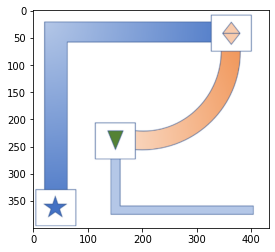

In [26]:
import cv2
import numpy as np
import math
import imutils
from matplotlib import pyplot as plt
def imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
def cartesian_distance(x, y): return math.sqrt(x**2+y**2)

frame = cv2.imread("Picture1.png")
# frame = cv2.imread("Picture2.jpg")
frame = imutils.resize(frame, height=400)
imshow(frame)

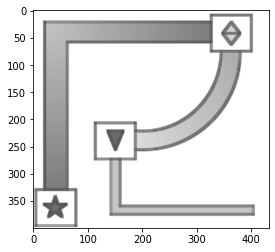

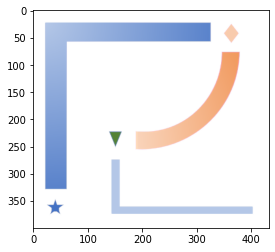

In [29]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
LUV = cv2.cvtColor(frame, cv2.COLOR_BGR2LUV)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(frame,kernel,iterations = 1)
dilation = cv2.dilate(frame,kernel,iterations = 1)
imshow(erosion)
imshow(dilation)

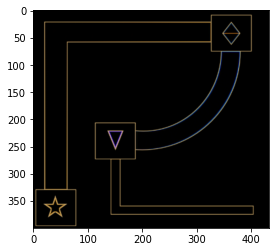

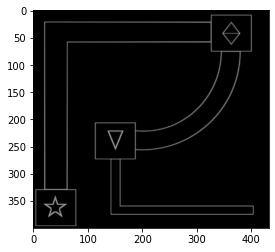

True

In [30]:
diff = cv2.absdiff(dilation, frame)
imshow(diff)
diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
imshow(diff)
cv2.imwrite("diff.jpg", diff)

In [ ]:
edges = cv2.Canny(diff, 20, 100)

Found 11 connected edges.


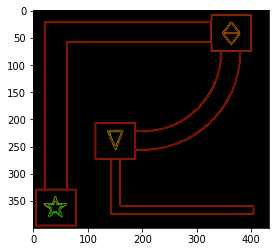

Found 40 contours.


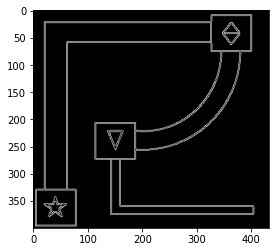

In [21]:
edges = cv2.Canny(diff, 20, 100)


## Find connected edges
ret, labels = cv2.connectedComponents(edges)
colors = [(0, 0, 255), (0, 43, 255), (0, 85, 255), (0, 128, 255), (0, 170, 255), (0, 213, 255), (0, 255, 255), (0, 255, 212), (0, 255, 170), (0, 255, 127), (0, 255, 85), (0, 255, 42), (0, 255, 0), (43, 255, 0), (85, 255, 0), (128, 255, 0), (170, 255, 0), (213, 255, 0), (255, 255, 0), (255, 212, 0), (255, 170, 0), (255, 127, 0), (255, 85, 0), (255, 42, 0), (255, 0, 0)]
## Draw(set to different colors)
canvas = np.zeros_like(frame, np.uint8)
for i in range(1,ret):
    pts = labels == i
    canvas[pts] = colors[i%len(colors)]
print("Found {} connected edges.".format(ret-1))
imshow(canvas)
    
contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

black = np.zeros(frame.shape[:2], dtype="uint8") # For visualize card border
print("Found " + str(len(contours)) + " contours.")
for i in range(len(contours)): # Draw each contours
    cv2.drawContours(black, contours, i, 255, 1)
imshow(black)